# Classification Model
 
#####    - classify the compound as either "musk" or "non-musk"
####    - using logistic regression ,decision tree  and neural network ( multi-layer perceptron)

In [32]:
#import libraries
import numpy as np 
import pandas as pd


In [33]:
data=pd.read_csv(r"C:\Users\shilp\OneDrive\Desktop\musk_csv.csv" )

In [34]:
data.head(6)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,...,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,-44,98,-33,-314,-282,-335,-144,-13,-197,-2,-144,-13,-11,-131,108,-43,42,-151,-4,8,-102,51,...,-247,-306,-308,-230,-166,-35,-205,-280,-239,-53,-10,-23,25,-5,163,61,59,-39,92,72,113,-107,80,25,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,-153,113,-166,-318,-241,-329,-97,-69,-108,-179,-71,-27,-12,-133,107,-96,92,-140,48,26,-62,2,...,-281,-305,-294,-262,-165,-117,-244,-246,-231,3,-2,-3,15,49,99,37,84,22,66,131,109,-77,-10,-17,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,-172,93,-42,-317,-242,-331,-98,-71,-106,-128,-71,-26,-12,-131,147,-93,93,-139,40,51,-28,-179,...,-271,-305,-296,-265,-168,-119,-244,-247,-230,3,-2,-3,-23,12,128,38,85,24,61,122,74,-36,-129,19,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,...,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,...,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
5,6,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,-168,-39,-22,-319,-112,-104,-284,-283,-304,52,-153,-97,-225,-28,-22,3,180,49,-33,47,-88,21,79,-116,18,-11,5,-38,72,-175,3,-129,38,-172,93,-41,-318,-243,-332,-98,-71,-106,-126,-72,-26,-11,-130,148,-93,93,-139,40,51,-26,-179,...,-272,-306,-297,-265,-168,-120,-244,-247,-230,3,-2,-3,-23,12,128,38,85,25,61,122,74,-37,-130,19,40,63,-1,-24,-14,-129,-74,-126,-222,-93,53,-72,-18,-33,-26,4,49,17,-177,-101,-119,-65,-80,52,-41,-27,-41,-141,76,-164,-239,-138,-156,56,143,142,164,-67,-145,40,1


In [35]:
data.shape

(6598, 170)

In [36]:
#checking for null values
data.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [37]:
pd.set_option('display.max_columns', 130)

In [38]:
data

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,...,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,-44,98,-33,-314,-282,-335,-144,-13,-197,-2,-144,-13,-11,-131,108,-43,42,-151,-4,8,-102,51,...,-247,-306,-308,-230,-166,-35,-205,-280,-239,-53,-10,-23,25,-5,163,61,59,-39,92,72,113,-107,80,25,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,-153,113,-166,-318,-241,-329,-97,-69,-108,-179,-71,-27,-12,-133,107,-96,92,-140,48,26,-62,2,...,-281,-305,-294,-262,-165,-117,-244,-246,-231,3,-2,-3,15,49,99,37,84,22,66,131,109,-77,-10,-17,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,-172,93,-42,-317,-242,-331,-98,-71,-106,-128,-71,-26,-12,-131,147,-93,93,-139,40,51,-28,-179,...,-271,-305,-296,-265,-168,-119,-244,-247,-230,3,-2,-3,-23,12,128,38,85,24,61,122,74,-36,-129,19,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,...,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,...,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,-153,-20,-130,-59,73,

In [39]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,...,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,12.700667,-94.105335,24.210821,-45.615186,-121.602758,-125.547439,-170.321461,-95.759018,-87.315399,-24.237951,-54.001819,-91.248863,-67.800697,-55.654744,7.128221,80.092452,-62.756896,5.114580,-112.445893,26.498030,-36.375417,-23.988027,-54.988481,1.634435,-17.274022,...,-102.374204,-120.374659,-135.487572,-103.31070,-133.560473,-108.788724,-78.686875,-130.175053,-84.534101,-60.493786,-61.240376,-56.862989,-40.597908,-9.352380,61.939527,-42.358745,-17.505305,-52.381631,21.712337,63.267505,56.299939,-0.655199,-0.861928,51.431040,-46.587754,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,80.750001,84.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [41]:
data.corr()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,...,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,1.000000,-0.197844,0.119750,0.179274,0.248703,-0.106119,0.165094,-0.140705,0.430635,-0.179556,-0.028260,0.427975,0.342264,0.209379,0.461400,0.470128,0.238941,-0.052881,0.284038,0.397699,0.296732,-0.079327,-0.174111,-0.073456,-0.022197,-0.117705,-0.198410,0.040396,0.066798,0.164355,-0.094984,0.145880,-0.020437,0.006309,-0.104532,0.123206,0.033078,0.287410,-0.084612,0.078497,-0.027156,0.151121,-0.258163,0.009075,0.453668,0.474398,0.412289,0.211854,-0.147979,0.412187,0.057009,0.077511,-0.175726,-0.179090,0.399004,0.004448,-0.012214,-0.086865,0.206675,0.187054,-0.115040,0.215317,0.071731,-0.170663,-0.019436,...,0.420092,0.434486,0.466963,0.414955,0.092222,-0.113958,0.468320,0.476737,0.466967,-0.051157,-0.129563,-0.149216,-0.050906,-0.069489,-0.069676,-0.150660,-0.112831,0.053049,-0.112591,-0.037970,-0.037154,0.276527,0.199485,0.209752,-0.116567,-0.099457,-0.022852,0.178133,-0.011888,0.310232,0.006023,0.292567,0.415369,0.208506,-0.044381,0.280844,-0.152511,-0.023160,-0.011666,-0.073981,-0.130339,-0.143681,-0.040152,0.154451,0.084384,0.242894,0.254558,0.023061,0.010038,0.164586,0.130713,-0.051435,-0.176425,-0.020759,0.128405,0.057309,0.046844,-0.224905,-0.148977,-0.328034,0.291805,0.039315,-0.196997,-0.043655,-0.625410
f1,-0.197844,1.000000,-0.142464,-0.164292,-0.291054,0.001037,0.090659,0.071879,-0.416191,0.090701,0.185305,-0.489531,-0.329323,-0.145467,-0.451025,-0.474834,-0.168133,0.061720,-0.217193,-0.363618,-0.263439,0.064906,0.042014,0.061941,0.235260,0.241263,0.136936,0.046363,-0.077570,-0.146275,0.246323,0.137254,0.116489,-0.063658,0.282979,-0.228776,0.421946,-0.168445,0.131857,-0.150626,0.122952,-0.184813,0.113988,0.084284,-0.483777,-0.450767,-0.447353,-0.113337,0.136657,-0.365678,0.027721,-0.116103,0.052545,0.077301,-0.402620,0.228630,0.058334,0.089833,-0.135390,-0.034918,0.242785,-0.217548,-0.077955,0.550183,0.231553,...,-0.451691,-0.489110,-0.475776,-0.395716,-0.099310,0.104087,-0.425888,-0.466595,-0.475689,0.042056,0.065549,0.058188,0.224117,0.188074,0.250122,0.132359,0.084044,-0.043288,0.237476,0.230005,0.264468,-0.090217,-0.043255,0.378745,0.240134,0.270847,0.130106,-0.282326,0.188010,-0.142333,0.018388,-0.256826,-0.394867,-0.086513,0.123043,-0.158354,0.119479,0.046166,-0.034662,0.123627,0.113538,0.107770,0.065500,-0.008926,-0.088045,-0.107410,-0.170390,0.094255,-0.167098,-0.305877,-0.325536,-0.140517,0.102513,-0.132298,-0.079600,0.010485,0.146428,-0.153096,0.002383,0.634797,-0.061317,0.142004,0.443060,-0.057199,-0.120883
f2,0.119750,-0.142464,1.000000,0.611675,-0.244145,-0.134689,0.125947,-0.449526,0.187318,-0.484187,0.270608,0.052151,-0.023072,0.088225,0.172705,0.124140,0.053458,-0.449154,0.073063,0.017114,0.182890,-0.332913,-0.474994,-0.450216,0.284007,0.349150,-0.435672,-0.174971,-0.087526,-0.151403,0.336306,0.116604,0.189070,-0.367302,0.285640,-0.359259,0.067595,-0.075352,-0.356764,0.428873,-0.285192,0.809694,0.160548,0.159408,0.103710,0.131702,0.059446,-0.194006,-0.372237,0.153385,0.263934,-0.171832,-0.486914,-0.466812,0.027713,0.211918,-0.277394,-0.447971,0.745077,-0.042998,0.308213,-0.264091,0.550812,-0.258740,0.330086,...,0.100465,0.064571,0.122714,0.173527,-0.199151,-0.378080,0.198108,0.124472,0.127425,-0.408167,-0.464382,-0.474805,0.342850,0.173562,0.343162,-0.411681,-0.437233,-0.111171,0.347174,0.198286,0.266398,-0.186745,0.309133,0.004655,0.240809,0.316801,0.184939,-0.306362,-0.017298,0.095467,-0.189755,0.067644,0.205260,0.209092,-0.

In [42]:
data.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [43]:
data["class"].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [44]:
data["molecule_name"].value_counts()

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-318        2
NON-MUSK-295        2
NON-MUSK-309        2
NON-MUSK-j96        1
NON-MUSK-j97        1
Name: molecule_name, Length: 102, dtype: int64

In [45]:

data["conformation_name"].describe()

count        6598
unique       6598
top       308_1+2
freq            1
Name: conformation_name, dtype: object

In [46]:
import seaborn as sns




In [47]:
from sklearn.model_selection import  train_test_split

In [48]:
y=data["class"]

In [49]:

x=data.drop(["conformation_name","molecule_name","ID","class"],axis=1)

In [50]:
X=np.array(x).astype(float)  
Y=np.array(y).astype(float)
X.shape

(6598, 166)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train,y_train)
predicted_classes = model.predict(x_test)


C:\Users\shilp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
from sklearn import datasets, linear_model, metrics 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, predicted_classes)*100) 

Logistic Regression model accuracy(in %): 94.6969696969697


# Using Decision Tree


In [54]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
c=model1.predict(x_test)

In [56]:
print("decision tree model accuracy(in %):",  
metrics.accuracy_score(y_test,c)*100) 

decision tree model accuracy(in %): 96.06060606060606


# using deep learning model 

In [57]:
import matplotlib.pyplot as plt

In [58]:
import keras

Using TensorFlow backend.


In [59]:
from sklearn.preprocessing import StandardScaler
func= StandardScaler()
X= func.fit_transform(X)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Activation


In [141]:
model = Sequential()
model.add(Dense(180,activation='linear',input_dim = 166))
model.add(Dense(100, activation="relu"))

model.add(Dense(70, activation="relu"))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])     
history=model.fit(x_train,y_train,shuffle=True, epochs=10,batch_size=100,validation_split=0.2)



Train on 4222 samples, validate on 1056 samples
Epoch 1/10
4222/4222 [==============================] - 8s 2ms/step - loss: 0.2368 - acc: 0.8993 - val_loss: 0.1586 - val_acc: 0.9422
Epoch 2/10
4222/4222 [==============================] - 0s 104us/step - loss: 0.1100 - acc: 0.9621 - val_loss: 0.1043 - val_acc: 0.9564
Epoch 3/10
4222/4222 [==============================] - 0s 103us/step - loss: 0.0787 - acc: 0.9711 - val_loss: 0.0866 - val_acc: 0.9650
Epoch 4/10
4222/4222 [==============================] - 0s 98us/step - loss: 0.0574 - acc: 0.9770 - val_loss: 0.0687 - val_acc: 0.9754
Epoch 5/10
4222/4222 [==============================] - 0s 111us/step - loss: 0.0481 - acc: 0.9811 - val_loss: 0.0529 - val_acc: 0.9801
Epoch 6/10
4222/4222 [==============================] - 0s 111us/step - loss: 0.0519 - acc: 0.9806 - val_loss: 0.0756 - val_acc: 0.9744
Epoch 7/10
4222/4222 [==============================] - 0s 113us/step - loss: 0.0322 - acc: 0.9889 - val_loss: 0.0402 - val_acc: 0.9858
Epo

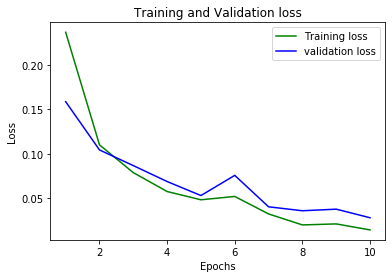

In [142]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

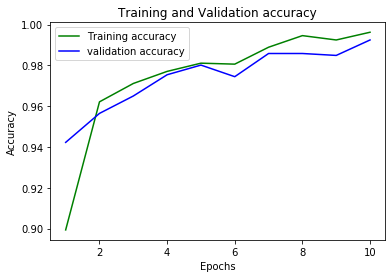

In [143]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [144]:
score = model.evaluate(x_test,y_test)
print("LOSS:")
print(score[0])
print("precision:")         
print(score[1])

1320/1320 [==============================] - 0s 148us/step
LOSS:
0.03434824636594082
precision:
0.9871212121212121
